# Importing Libararies/Dependencies and Data

In [2]:
!pip install tensorflow 
!pip install matplotlib
!pip install -U keras-tuner
!pip install keras
!pip install numpy
!pip install keras.preprocessing
!pip install keras
!pip install Keras-Applications
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/COVID-19_Radiography_Database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3729.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3737.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3734.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3725.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3730.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3741.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3736.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3733.png
/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3735.png
/con

# Loading libraries

In [4]:

import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras.applications 
import keras.applications
#from keras.applications import VGG19

  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl


#Loading Data

In [8]:



train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 15153 files belonging to 3 classes.
Using 12123 files for training.
Found 15153 files belonging to 3 classes.
Using 3030 files for validation.


#Defining Classes

In [9]:
#classes 
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


#Visulaizing Dataset

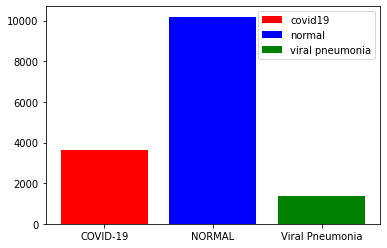

In [10]:

fig, ax = plt.subplots()
ax.bar("COVID-19",3616,color="r",label="covid19")
ax.bar("NORMAL",10192,color="b",label="normal")
ax.bar("Viral Pneumonia",1345,color="g",label="viral pneumonia")
ax.legend()

#Creating CNN MODEL 


In [11]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

In [12]:
#to avoiding overfitting problem
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

#Compile model

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train model

In [14]:
## fit model
history=model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 5,callbacks=[early])

Epoch 1/5
379/379 [==============================] - 2171s 6s/step - loss: 0.4554 - accuracy: 0.8404 - val_loss: 0.2411 - val_accuracy: 0.9089
Epoch 2/5
379/379 [==============================] - 68s 177ms/step - loss: 0.2200 - accuracy: 0.9173 - val_loss: 0.2043 - val_accuracy: 0.9221
Epoch 3/5
379/379 [==============================] - 66s 173ms/step - loss: 0.1563 - accuracy: 0.9430 - val_loss: 0.1660 - val_accuracy: 0.9419
Epoch 4/5
379/379 [==============================] - 66s 172ms/step - loss: 0.1112 - accuracy: 0.9572 - val_loss: 0.1928 - val_accuracy: 0.9267
Epoch 5/5
379/379 [==============================] - 66s 174ms/step - loss: 0.0761 - accuracy: 0.9729 - val_loss: 0.1780 - val_accuracy: 0.9449


#Evaluate model: Loss & Accuracy

In [15]:
#evaluate model
model.evaluate(test_data)

95/95 [==============================] - 9s 93ms/step - loss: 0.1780 - accuracy: 0.9449


[0.1780371367931366, 0.9448844790458679]

# Visualizing Training and Validation: Loss & Accuracy

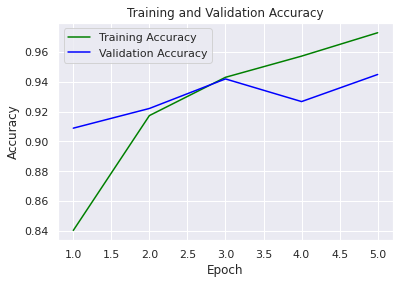

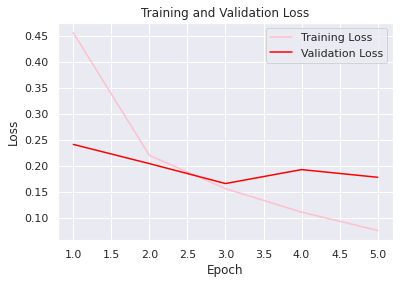

In [16]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Check IF PATIENT is NORMAL?(Taken randomly from google images)

[1]
NORMAL


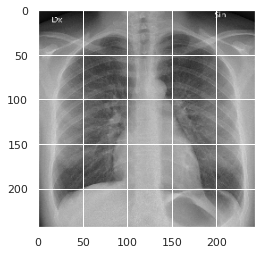

In [ ]:
image_path = "/content/drive/MyDrive/COVID-19_Radiography_Database/normal.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

# Check if patient has COVID-19?(Taken randomly from google images)

[0]
COVID-19


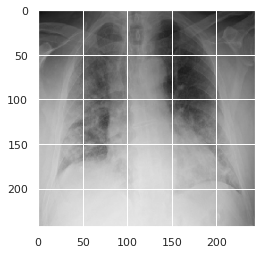

In [ ]:

image_path = "/content/drive/MyDrive/COVID-19_Radiography_Database/covid-19.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

# Check if patient has Virual Pneumonia?(Taken randomly from google images)

[2]
Viral Pneumonia


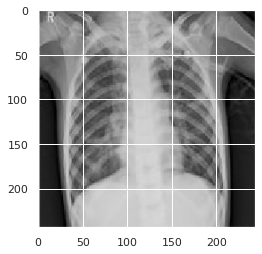

In [17]:
image_path = "/content/drive/MyDrive/COVID-19_Radiography_Database/viral p2.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

# Saving Model

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")